In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from scipy.interpolate import make_interp_spline
from sympy import diff
%matplotlib inline 

In [2]:
a = -3
b = 2
e = 0.0001

A3 = 1
A2 = 2
A1 = 2
A0 = 1

In [3]:
def func(x):
    return x**4 + A3*x**3 + A2*x**2 + A1*x + A0

In [25]:
def find_min(a, b, e):
    delta = 0.00001
    i = 1
    d = {}
    d[i] = [a, b, func(a), func(b)]
    while True:
        x1 = (a + b - delta) / 2
        x2 = (a + b + delta) / 2
        f1 = func(x1)
        f2 = func(x2)

        i += 1
        d[i] = [x1, x2, f1, f2]
        
        if f1 < f2:
            b = x2 
        else: 
            a = x1
        if abs(b - a) < e:
            break 
    
    x_min = a
    f_min = func(x_min)

    inf = pd.DataFrame.from_dict(d, orient='index', columns=['x1', 'x2', 'f(x1)', 'f(x2)'])
    
    xi = np.linspace(-3, 2, 100)
    plt.figure(figsize=(15,8))
    plt.plot(xi, [func(x) for x in xi], color='orange')
    plt.plot(x_min, f_min, 'ro', ms=10)
    plt.grid(True)
    plt.legend(['Функция f(x)', 'Точка минимума'], loc=0)

    for i in range(1, len(inf)):
        x_values1 = [inf['x1'][i], inf['x1'][i]]
        x_values2 = [inf['x2'][i], inf['x2'][i]]
        y_values1 = [0, func(x_values1[0])]
        y_values2 = [0, func(x_values2[0])]
        plt.plot(x_values1, y_values1, color='g')
        plt.plot(x_values2, y_values2, color='g')

    return [a, b] 

[-0.5596667459106447, -0.55958045211792]

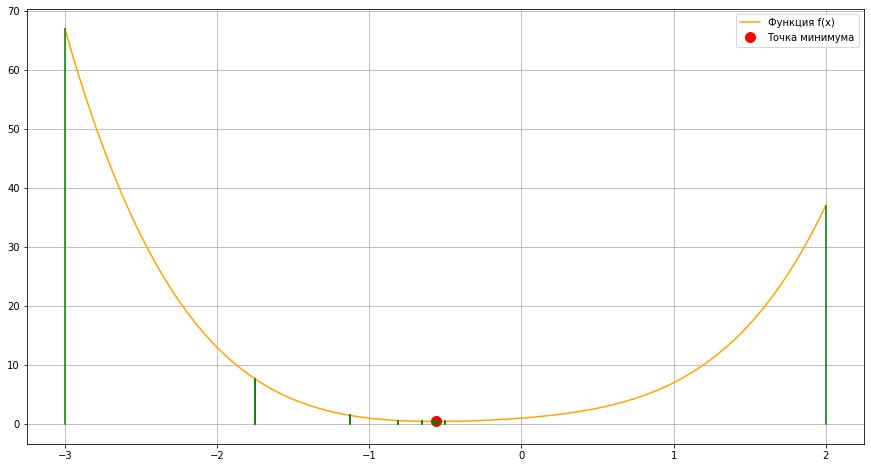

In [26]:
find_min(a, b, e) 